<a href="https://colab.research.google.com/github/ykanematsu/reaxfit/blob/main/reaxfit_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ReaxFF sample
- A sample notebook for [reaxfit](https://github.com/ykanematsu/reaxfit).
- Potential energy curve for dissociation of a carbon monoxide on covalt surface.
- ~10 min including the installation on colab.

## Install

In [2]:
!apt install -y -qq subversion

subversion is already the newest version (1.13.0-3ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [3]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:15
🔁 Restarting kernel...


wait for session restarting

In [1]:
!svn export https://github.com/ykanematsu/reaxfit/trunk/example/CoCO

A    CoCO
A    CoCO/0.xyz
A    CoCO/1.xyz
A    CoCO/2.xyz
A    CoCO/3.xyz
A    CoCO/4.xyz
A    CoCO/5.xyz
A    CoCO/6.xyz
A    CoCO/batch.sh
A    CoCO/chk.py
A    CoCO/config.json
A    CoCO/data0
A    CoCO/ffield.reax
A    CoCO/ffield.temp
A    CoCO/refE
A    CoCO/refF
A    CoCO/run.py
Exported revision 59.


In [2]:
%cd CoCO/

/content/CoCO


In [8]:
!mamba install -q -y -c conda-forge lammps
!mamba install -q -y scipy numpy

Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working...  
For Linux 64, Open MPI is built with CUDA awareness but this support is disabled by default.
To enable it, please set the environment variable OMPI_MCA_opal_cuda_support=true before
launching your MPI processes. Equivalently, you can set the MCA parameter in the command line:
mpiexec --mca opal_cuda_support 1 ...
 
In addition, the UCX support is also built but disabled by default.
To enable it, first install UCX (conda install -c conda-forge ucx). Then, set the environment
variables OMPI_MCA_pml="ucx" OMPI_MCA_osc="ucx" before launching your MPI processes.
Equivalently, you can set the MCA parameters in the command line:
mpiexec --mca pml ucx --mca osc ucx ...
Note that you might also need to set UCX_MEMTYPE_CACHE=n for CUDA awareness via UCX.
Please consult UCX's documentation for detail.
 

done


In [9]:
!pip3 install reaxfit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for reaxfit: filename=reaxfit-0.1.0-py3-none-any.whl size=5061 sha256=1d54b0cf280e4561b9bcb7d12ebd72d6a4d5adef35ea1f514a163477f965b903
  Stored in directory: /root/.cache/pip/wheels/1a/a5/cc/7030c3457a352bbc2b96e0e62a5ae9818497d5832596833e37
Successfully built reaxfit


## Run Fitting


In [10]:
from reaxfit import reaxfit
reax=reaxfit()
reax.config(workers=2,bound=0.08)
@reax.set_eval
def my_eval(pes,fns,refE,refF):
  pes-=pes[0]
  pes*=0.043364124
  pes-=refE
  return pes@pes
result=reax.fit(my_eval)
print("optimized paramters: ",result.x)

read config.json
initial 3 parameters : [2.40512, 6.41168, 2.04134]
differential_evolution step 1: f(x)= 0.158476
differential_evolution step 2: f(x)= 0.158476
differential_evolution step 3: f(x)= 0.081845
differential_evolution step 4: f(x)= 0.081845
differential_evolution step 5: f(x)= 0.081845
differential_evolution step 6: f(x)= 0.0713867
differential_evolution step 7: f(x)= 0.0703601
differential_evolution step 8: f(x)= 0.0693205
differential_evolution step 9: f(x)= 0.0693205
differential_evolution step 10: f(x)= 0.0643847
differential_evolution step 11: f(x)= 0.0643847
differential_evolution step 12: f(x)= 0.0643847
differential_evolution step 13: f(x)= 0.0636939
differential_evolution step 14: f(x)= 0.0636939
differential_evolution step 15: f(x)= 0.0636939
differential_evolution step 16: f(x)= 0.0630542
differential_evolution step 17: f(x)= 0.0630542
differential_evolution step 18: f(x)= 0.0630542
differential_evolution step 19: f(x)= 0.0630542
differential_evolution step 20: f(

In [11]:
# print the resulting energies
pes,fns=reax.reax(reax.x0) # energies for initial parameters
pes-=pes[0]
pes*=0.043364124
E=reax.E # the fitted energies
E-=E[0]
E*=0.043364124
print(E)

[0.         0.1127928  0.57606361 2.33396203 1.26358668 1.40526863
 1.05006819]


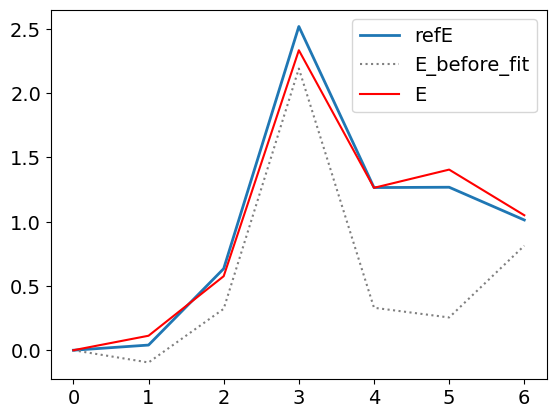

In [12]:
# compare the reference energy (by VASP) and the fitted energy (by ReaxFF)
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
plt.plot(reax.refE,label="refE",lw=2)
plt.plot(pes,ls=":",label="E_before_fit",color="gray")
plt.plot(E,label="E",color="red")
plt.legend()
plt.show()